In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
sns.set(color_codes=True)

In [8]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


__Plot the count distribution (Bernoulli) of survival__<br>

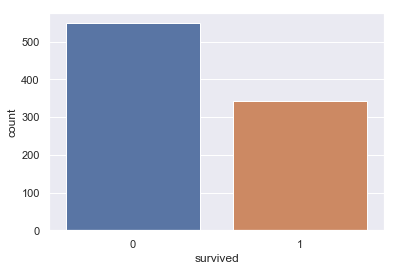

In [9]:
sns.set(style="darkgrid")
titanic = sns.load_dataset("titanic")
plot_1 = sns.countplot(x='survived', data=titanic)

__Separate this distribution now also by Gender__

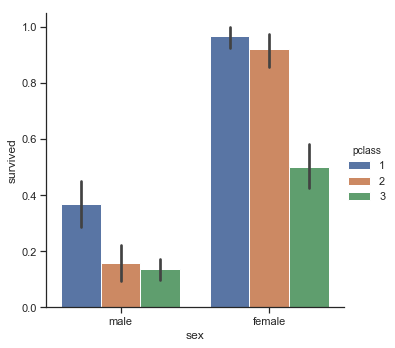

In [10]:
sns.set(style="ticks")
titanic = sns.load_dataset("titanic")
plot_2 = sns.catplot(x="sex", y="survived", hue="pclass", data=titanic, kind="bar")

<br>__Plot SibSp vs Survived per gender and Pclass using sns.catplot__

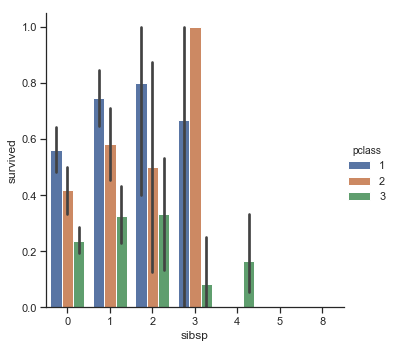

In [82]:
sns.set(style="ticks")
titanic = sns.load_dataset("titanic")
plot_3 = sns.catplot(x="sibsp", y="survived", hue="pclass", data=titanic, kind="bar")

<br>__Plot the distribution of fare for each Pclass, color by Survived, use sns.boxplot__

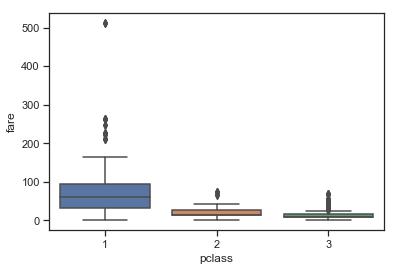

In [12]:
plot_4 = sns.boxplot(x="pclass", y="fare", data=titanic)

Data visualization is an important part of any data analysis. It helps us to recognize relations between variables and also to find which variables are significant or which variable can affect the predicted variable.

In machine learning model while training any model you need to first find which features are important or on which features the result is dependent. This can be done using data analysis and data visualization.

We’ll learn how to visualize different types of data, and what we can infer from that plot, and when to use them.
Seaborn is a library built on matplotlib. It’s easy to use and can work easily with Numpy and pandas data structures.

__Loading the dataset__

In [70]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<br><br>__Visualizing a Univariate Distribution Data__<br>
These plots are based on a single variable and show the frequency of uniques values of a given variable. A univariate distribution, as its name suggests, is build upon a quantitative variable. It can be visualized either using a histogram, a kernel density estimation, a rug plot, or combining all of them.<br>

__1. Histogram__
A histogram is built in the Seaborn library using the distplot method. The distplot method is also responsible for the building of other univariate plots.

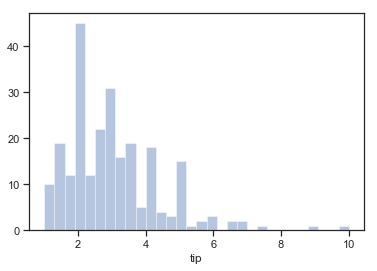

In [71]:
sns.distplot(tips['tip'], kde=False, bins=30);

Larger the bins value more accurate the result.We can see that the count of different tip value present in the dataset and infer that most of the tips are between 2 and 4.<br>

<br>__2. Kernel Density Estimation Plot__<br><br>
In the above figure notice the shape of histogram peaks, using the Kernel Density Estimation (KDE) plot you can fit the best line for the data. KDE plot is built on the histogram bin peaks by default using the  distplot method.<br> Therefore, you can either use kde=True or remove  kde=False from the method. Also, make sure to pass hist=False to disable the histogram from the plot.<br>

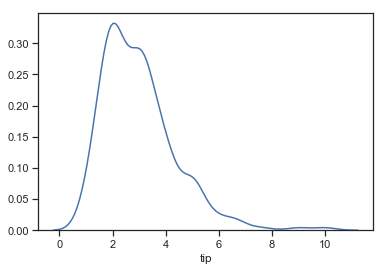

In [72]:
sns.distplot(tips['tip'],hist=False, bins=30);

KDE is a way to estimate the probability density function of a continuous random variable. It is used when you need to know the distribution of the variable.

<br>__Statistical data types__

__1. Scatter Plot__
A scatter plot is helpful to determine the relationship between two variables. Using a scatter plot, we can determine if there is any correlation between the two or not. Through Seaborn, we can visualize a scatter plot as well as visualize the distribution of each variable. This can be achieved using the jointplot method as shown:

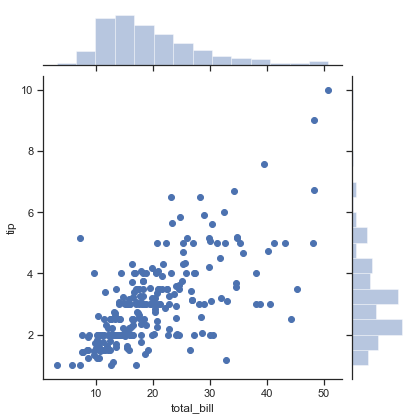

In [75]:
sns.jointplot(x="total_bill", y="tip", data=tips);

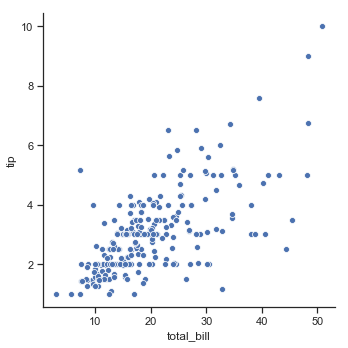

In [76]:
sns.relplot(x="total_bill", y="tip", data=tips);

Default plot type of relplot is scatterplot. It shows the relationship between two variables. So, if you need to find the correlation between two variables scatterplot can be used.
In the given example we can see that if total_bill is between 10–20 than the tip will be mostly above 2.
We can add the third variable also in scatterplot using different colors or shape of dots.

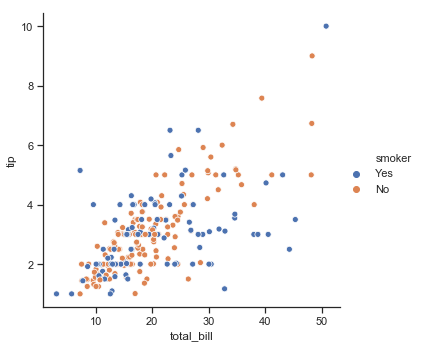

In [77]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

__2. Hexbin Plot__
The hexbin plot is similar to that of a histogram plot because it presents the count of each observation falling in the hex bins over a 2D space. The denser a bin, the more the number of observations it holds and vice-versa.

Hexbin plot is implemented in Seaborn using the jointplot method with kind='hex' argument. Let us implement the hex bin on the bi dataset:

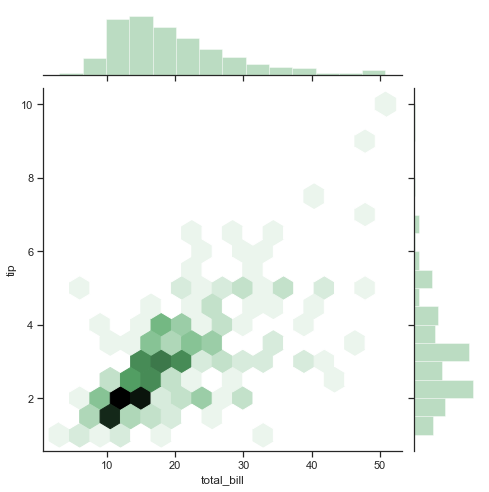

In [78]:
# Hexbin plot with bivariate distribution
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex', height=7, color='g')

# Displaying the figure
plt.show()

<br>__3. KDE Plot__<br>
The KDE plot for a bivariate data can be obtained using the jointplot method with kind='kde' argument. This will provide the best fit lines over the axes and the contour plots inside the axes.

Let us visualize it with our dataset:

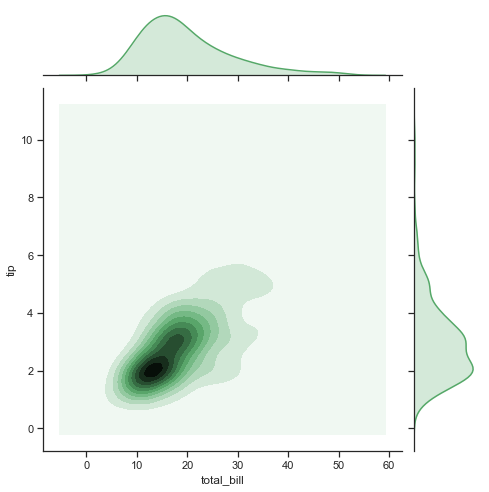

In [79]:
# KDE plot with bivariate distribution
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde', height=7, color='g')

# Displaying the figure
plt.show()

After observing the contour plot we can suggest that there is high-density data in the center and the data density decreases as we go further out. The same is verified from the KDE plot

<br>__Visualizing Pairwise Relationships in a Dataset__<br>
Most of the time, a dataset under study has more than two variables. We cannot use any of the above methods to visualize the relationship among all the variables at the same time. Therefore, Seaborn provides us a different approach to tackle such cases.<br>

Seaborn has the pairplot method through which we can create a matrix of plots (or subplots) using all or specific variables from the dataset.<br>

Implementing the pairplot method on the dataset:

__seaborn.boxplot__<br>

arguments:- (x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)<br>

A bloxplot displays the range and distribution of data along the number line.box plots include an additional character to represent the mean of the data.A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).


__seaborn.displot__<br>
<br>arguments(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)<br><br>

This plot is used for the plotting of univariate distribution of observations. It is very flexible in nature. To make density plots in seaborn, we can use either the distplot or kdeplot function. It is better to use the distplot function because it lets us make multiple distributions with one function call.<br>

It combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions.<br>

Displot by default have histograms and kernel density estimate.<br><br>
𝑥=𝑛𝑝.𝑟𝑎𝑛𝑑𝑜𝑚.𝑟𝑎𝑛𝑑𝑛()<br>
𝑎𝑥=𝑠𝑛𝑠.𝑑𝑖𝑠𝑡𝑝𝑙𝑜𝑡(𝑥)<br>
When this is used we get a histogram and KDE<br><br>
𝑎𝑥=𝑠𝑛𝑠.𝑑𝑖𝑠𝑡𝑝𝑙𝑜𝑡(𝑥,𝑟𝑢𝑔=𝑇𝑟𝑢𝑒,ℎ𝑖𝑠𝑡=𝐹𝑎𝑙𝑠𝑒)
<br>This line clearely explains that when the hist is given false in the following output there will be no histogram in the graph instead we get rug plot for each of our data.<br>
<br>𝑓𝑟𝑜𝑚𝑠𝑐𝑖𝑝𝑦.𝑠𝑡𝑎𝑡𝑠𝑖𝑚𝑝𝑜𝑟𝑡𝑛𝑜𝑟𝑚
𝑎𝑥=𝑠𝑛𝑠.𝑑𝑖𝑠𝑡𝑝𝑙𝑜𝑡(𝑥,𝑓𝑖𝑡=𝑛𝑜𝑟𝑚,𝑘𝑑𝑒=𝐹𝑎𝑙𝑠𝑒)<br>
To fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data.<br><br>
𝑎𝑥=𝑠𝑛𝑠.𝑑𝑖𝑠𝑡𝑝𝑙𝑜𝑡(𝑥,𝑣𝑒𝑟𝑡𝑖𝑐𝑎𝑙=𝑇𝑟𝑢𝑒)<br>
It gives the follwing graph in vertical format<br><br>
𝑠𝑛𝑠.𝑠𝑒𝑡𝑐𝑜𝑙𝑜𝑟𝑐𝑜𝑑𝑒𝑠()<br>
𝑎𝑥=𝑠𝑛𝑠.𝑑𝑖𝑠𝑡𝑝𝑙𝑜𝑡(𝑥,𝑐𝑜𝑙𝑜𝑟="𝑦")<br>
It changes the color attribute to be yellow for the Histogram and fthe KDE<br><br><br>
𝑎𝑥=𝑠𝑛𝑠.𝑑𝑖𝑠𝑡𝑝𝑙𝑜𝑡(𝑥,𝑟𝑢𝑔=𝑇𝑟𝑢𝑒,𝑟𝑢𝑔𝑘𝑤𝑠="𝑐𝑜𝑙𝑜𝑟":"𝑔", 𝑘𝑑𝑒𝑘𝑤𝑠="𝑐𝑜𝑙𝑜𝑟":"𝑘","𝑙𝑤":3"𝑙𝑎𝑏𝑒𝑙":"𝐾𝐷𝐸", ℎ𝑖𝑠𝑡𝑘𝑤𝑠="ℎ𝑖𝑠𝑡𝑡𝑦𝑝𝑒":"𝑠𝑡𝑒𝑝","𝑙𝑖𝑛𝑒𝑤𝑖𝑑𝑡ℎ":3,"𝑎𝑙𝑝ℎ𝑎":1,"𝑐𝑜𝑙𝑜𝑟":"𝑔")<br>
Here we are aiming to obtain rug plor and we have clearley mentioned its color.In the next step we are defining the color attribute and the label for the KDE. The final step is to achieve the histogram graph dor which we are mentioning the linewidth,color and here the alpha helps to makes the bars semi-translucent and right level of transparency.